# 카이제곱 분포와 F-분포
카이제곱 분포와 F-분포를 감마함수를 기반으로 유사한 확률분포다.본 글에서는 카이제곱 분포와 F분포에 대해서 알아보며, 분산검정에 대해 살펴보겠다.  

## 카이제곱 분포
카이제곱분포는 그리스 문자 $\chi$ 제곱들의 분포이다. k개의 서로 독립적이고 표준정규분포를 따르는 랜덤확률변수 x를 제곱한 값들을 합하였을 때의 분포이며, 이때 k 는 자유도 (degrees of freedom) 로서 카이제곱 분포의 parameter 가 된다. k개의 서로 독립적이고 표준정규분포에 따른 랜덤확률변수 $x_1,x_2 \cdots ,x_k$의 제곱의 합을 Q이다. 
$$Q = \sum_{i=1}^{k} x_i^2 $$
Q는 k개의 자유도를 가진 카이제곱 분포를 따른다.

$$Q \tilde \quad \chi^2(k)$$ 
사례를 통해서 살펴보겠다.  표준정규분포를 따르는 1개의 확률변수의 카이제곱 분포에서 $p(\chi^2=1)$의 값을 구한다고 가정해보자.  

$$\chi^2=1^2, z=1  \\
P(\chi^2=1)=p(X=1)^2$$
자유도가 k인 카이제곱 분포는 감마분포의 특수한 형태이다.

$$f(x\mid k) = \frac{1}{2^{k/2}\Gamma(k/2)}\,x^{k/2 - 1} e^{-x/2}\, \mathbf{1}_{\{x\geq0\}}$$

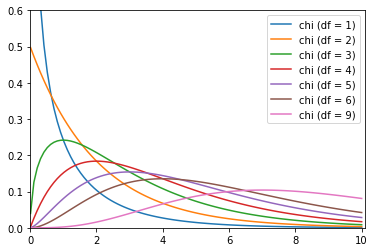

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

xx = np.linspace(0.01, 10, 100)
for df in [1, 2, 3, 4, 5, 6, 9]:
    rv = st.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), label=("chi (df = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

## 카이제곱 검정 
카이제곱 검정은 모분산의 추정을 할때 쓰인다. k개의 확률 변수 $x_1 \cdots x_n$의 분산은 아래와 같이 나타낼수 수 있는데, 이는 자유도 k의 카이제곱 분포와 일치한다.   
$$ \frac{1}{\sigma^2} \sum^k_{i=1}(X_i -\mu)^2=\chi^2(k)$$

사례를 통해 살펴보겠다. A지역 태양광 발전소의 시간당 평균 발전량은 15kw, 표준편차는 2으로 알려져있다. 5개의 발전소를 조사한 결과, 발전소의 발전량은 '16, 18, 16, 14, 12'이다. 위 발전소의 실제 분산이 3이 넘을 확률을 구해보자. 

$$p(S^2>3)\ =\ p(\chi_4\ >\ 3)$$ 

In [15]:
from scipy.stats import chi2
chi2.pdf(x=3,df=4)

0.1673476201113224

## F분포 
두 확률변수 $V_1,V_2$가 자유도가 $k_1,k_2$ 서로 독립인 카이제곱분포에 따른다고 할때, 두 확률 분포의 분산의 비는 F분포를 따른다. 
$$ \frac{S_{V_1}}{S_{V_2}} \tilde \quad F_{k_1,k_2}  $$ 
$F_{k_1,k_2}$는 감마분포를 따르고 확률밀도함수는 아래와 같다. 
$$\frac{\Gamma(\frac{v_1+v_2}{2})}{\Gamma(\frac{v_1}{2})\Gamma(\frac{v_1}{2})2^{\frac{v}{2}}}(\frac{v_1}{v_2})^{\frac{\mu}{2}}x^{\frac{\mu}{2}-1}[1+(\frac{v_1}{v_2})x]^{-\frac{v_1+v_2}{2}}$$ 
확률밀도함수는 자유도에 따라 변화하는데, 그래프를 그리면 아래와 같다. 

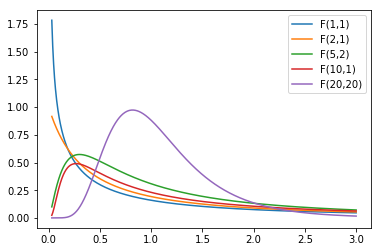

In [19]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, st.f(1,1).pdf(xx), label="F(1,1)")
plt.plot(xx, st.f(2,1).pdf(xx), label="F(2,1)")
plt.plot(xx, st.f(5,2).pdf(xx), label="F(5,2)")
plt.plot(xx, st.f(10,1).pdf(xx), label="F(10,1)")
plt.plot(xx, st.f(20,20).pdf(xx), label="F(20,20)")
plt.legend()
plt.show()

## F 검정 
F-검정은 두개의 분산 분석을 하는데 쓰인다. 특히 두 그룹간의 분산을 비고하는데 쓰인데, F검증의 모형은 아래와 같다. 

$$F=\frac{between-group \ variability}{within-group \ variability}  $$

앞선 태양광 발전소를 두개 지역에서 조사했다고 가정해보자. 발전량은 아래와 같다.
* A 지역: '16, 18, 16, 14, 12'
* B 지역: '15, 20, 22, 10, 8, 60'

In [40]:
a=[16, 18, 16, 14, 12];b=[15, 20, 22, 10, 8, 60]
np.std(a),np.std(b),np.std(a)/np.std(b),np.std(b)/np.std(a)

(2.0396078054371136,
 17.490473597552089,
 0.11661249731525684,
 8.5754102092209141)

A지역보다 B지역의 분산이 더 클것이라고 가정해보자. 두 분산의 모집단의 분산이 같다고 볼수 있는지 F-검정을 $\alpha$=0.05 에서 검정해보자. 

In [39]:
st.f.ppf(q=0.05,dfn=5, dfd=6, loc=0, scale=1),st.f.ppf(q=0.95,dfn=5, dfd=6, loc=0, scale=1)

(0.20200844599812529, 4.3873741874061274)

두 분산의 비는 $\alpha$=0.05의 신뢰구간에서 한참 벗어나가서 기각된다. 